# FILTRADO COLABORATIVO

In [6]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import SVD
from surprise import NMF
from surprise import SVDpp

import pandas as pd
from sklearn.model_selection import train_test_split

## Lectura y preprocesamiento de datos

In [22]:
# Cargar los datos
train_data = pd.read_csv('./data/recsys-filtrado-colaborativo-24-25/train.csv')
# Dividir los datos en conjuntos de entrenamiento y prueba, dejando una copia del conjunto de entrenamiento intacta
train_data_copy = train_data.copy()
train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=42)

submission_data = pd.read_csv('./data/recsys-filtrado-colaborativo-24-25/test.csv')

# Imprimir los tamaños de los conjuntos de datos
print(f"Tamaño del conjunto de entrenamiento: {len(train_data)}")
print(f"Tamaño del conjunto de prueba: {len(test_data)}")
print(f"Tamaño del conjunto de envío: {len(submission_data)}")

# Calcular el promedio y la desviación estándar de las valoraciones
avg_rating = train_data['rating'].mean()
std_rating = train_data['rating'].std()

print(f"Promedio de valoraciones: {avg_rating}")
print(f"Desviación estándar de valoraciones: {std_rating}")

Tamaño del conjunto de entrenamiento: 312280
Tamaño del conjunto de prueba: 78071
Tamaño del conjunto de envío: 43320
Promedio de valoraciones: 7.601796464711157
Desviación estándar de valoraciones: 1.8423898868091482


In [29]:
# El formato de Surprise requiere un archivo en el siguiente formato (usuario, item, rating).
# Convertimos el dataframe de train al formato adecuado para Surprise
reader = Reader(rating_scale=(1, 10))  # Definir el rango de las valoraciones (1 a 10)
train_data_surprise = Dataset.load_from_df(train_data[['user', 'item', 'rating']], reader)

# Crear el conjunto de entrenamiento
trainset = train_data_surprise.build_full_trainset()

# Convert the test_data DataFrame to a list of tuples (user, item, rating)
testset = list(test_data[['user', 'item', 'rating']].itertuples(index=False, name=None))

## Modelos

In [9]:
RMSEs = {}

### SVD

In [10]:
# Usar SVD como algoritmo
svd = SVD(verbose=True)

# Entrenar el modelo
svd.fit(trainset)

# Generate predictions for the testset
predictions = svd.test(testset)


# Calculate RMSE
rmse = accuracy.rmse(predictions)
RMSEs['SVD'] = rmse

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 1.6483


Lower than 0: 35789
Equal to 0: 119
Greater than 0: 42163
Proportion of lower than 0: 0.4584160571787219


C:\Users\afrai\AppData\Local\Temp\ipykernel_20896\610436706.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(differences, labels=['Differences'])


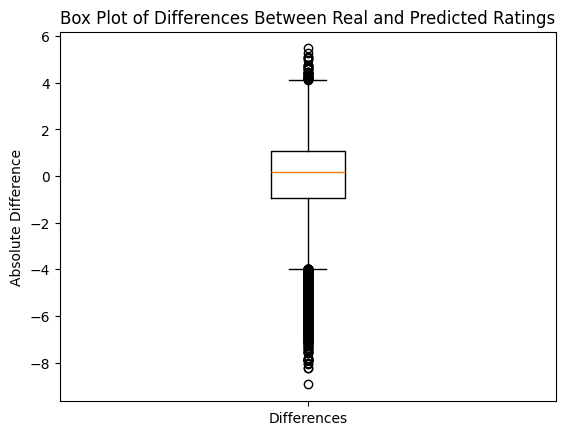

In [11]:
import matplotlib.pyplot as plt

# Calculate the absolute differences between real and predicted ratings
differences = [pred.r_ui - pred.est for pred in predictions]

# Count the number of differences lower than 0, equal to 0, and greater than 0
lower_than_zero = sum(diff < 0 for diff in differences)
equal_to_zero = sum(diff == 0 for diff in differences)
greater_than_zero = sum(diff > 0 for diff in differences)

print(f"Lower than 0: {lower_than_zero}")
print(f"Equal to 0: {equal_to_zero}")
print(f"Greater than 0: {greater_than_zero}")
print(f"Proportion of lower than 0: {lower_than_zero / len(differences)}")

# Create a box plot for the differences
plt.boxplot(differences, labels=['Differences'])
plt.ylabel('Absolute Difference')
plt.title('Box Plot of Differences Between Real and Predicted Ratings')
plt.show()


### NMF

In [5]:
nmf = NMF(verbose=True)
# Entrenar el modelo
nmf.fit(trainset)
# Generate predictions for the testset
predictions = nmf.test(testset)
# Calculate RMSE
rmse = accuracy.rmse(predictions)
RMSEs['NMF'] = rmse

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
RMSE: 2.46

### SVDpp

In [30]:
svdpp = SVDpp(verbose=True, cache_ratings=True)

# Entrenar el modelo
svdpp.fit(trainset)
# Generate predictions for the testset
predictions = svdpp.test(testset)
# Calculate RMSE
rmse = accuracy.rmse(predictions)
RMSEs['SVDpp'] = rmse

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
RMSE: 1.6583


Lower than 0: 35981
Equal to 0: 261
Greater than 0: 41829
Proportion of lower than 0: 0.4608753570467907


C:\Users\afrai\AppData\Local\Temp\ipykernel_20896\610436706.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(differences, labels=['Differences'])


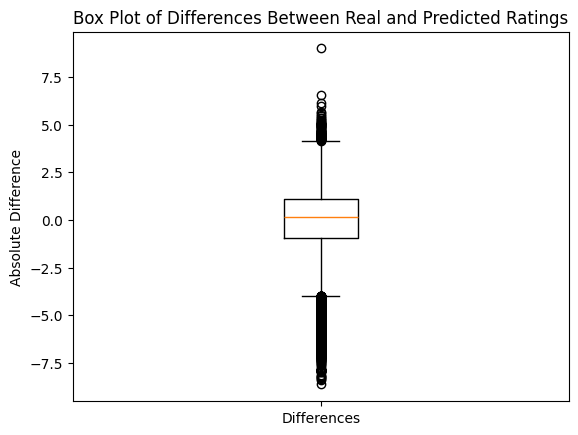

In [31]:
import matplotlib.pyplot as plt

# Calculate the absolute differences between real and predicted ratings
differences = [pred.r_ui - pred.est for pred in predictions]

# Count the number of differences lower than 0, equal to 0, and greater than 0
lower_than_zero = sum(diff < 0 for diff in differences)
equal_to_zero = sum(diff == 0 for diff in differences)
greater_than_zero = sum(diff > 0 for diff in differences)

print(f"Lower than 0: {lower_than_zero}")
print(f"Equal to 0: {equal_to_zero}")
print(f"Greater than 0: {greater_than_zero}")
print(f"Proportion of lower than 0: {lower_than_zero / len(differences)}")

# Create a box plot for the differences
plt.boxplot(differences, labels=['Differences'])
plt.ylabel('Absolute Difference')
plt.title('Box Plot of Differences Between Real and Predicted Ratings')
plt.show()


### KNN basic

In [21]:
from surprise import KNNBasic

knnb = KNNBasic(k=80, sim_options={'name': 'msd', 'user_based': True, 'implicit': True}, verbose=True)
# Entrenar el modelo
knnb.fit(trainset)
# Generate predictions for the testset
predictions = knnb.test(testset)
# Calculate RMSE
rmse = accuracy.rmse(predictions)
RMSEs['KNNBasic'] = rmse

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.9284


### KNN with Z-Score

In [5]:
from surprise import KNNWithZScore
knnz = KNNWithZScore(k=40, sim_options={'name': 'msd', 'user_based': True, 'implicit': False}, verbose=True)
# Entrenar el modelo
knnz.fit(trainset)
# Generate predictions for the testset
predictions = knnz.test(testset)
# Calculate RMSE
rmse = accuracy.rmse(predictions)
RMSEs['KNNWithZScore'] = rmse

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.8389


## Analysis

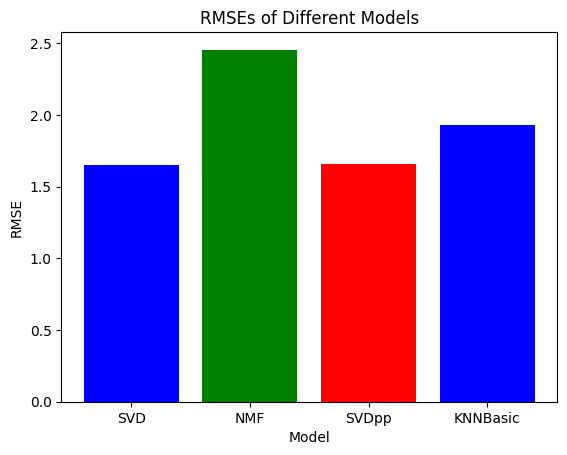

In [22]:
import matplotlib.pyplot as plt

# Plot the RMSEs
plt.bar(RMSEs.keys(), RMSEs.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSEs of Different Models')
plt.show()

## Optimizacion de parametros

In [12]:
from surprise.model_selection import GridSearchCV

# Definir el rango de hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 40, 60],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.1, 0.2]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1, joblib_verbose=2)

# Ejecutar la búsqueda en cuadrícula
grid_search.fit(train_data_surprise)

# Obtener los mejores hiperparámetros y el mejor RMSE
best_params = grid_search.best_params['rmse']
best_rmse = grid_search.best_score['rmse']

print(f"Mejores hiperparámetros: {best_params}")
print(f"Mejor RMSE: {best_rmse}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.0min


Mejores hiperparámetros: {'n_factors': 50, 'n_epochs': 40, 'lr_all': 0.005, 'reg_all': 0.2}
Mejor RMSE: 1.6517784282632633


[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 12.4min finished


## Final Predictions

In [26]:
# Seleccionar el mejor modelo
# model = NMF(verbose=True, n_factors=100, n_epochs=50)
# model = SVD(verbose=True)
model = SVDpp(verbose=True)

reader = Reader(rating_scale=(1, 10))  # Definir el rango de las valoraciones (1 a 10)
train_data_surprise = Dataset.load_from_df(train_data_copy[['user', 'item', 'rating']], reader)

# Crear el conjunto de entrenamiento
trainset = train_data_surprise.build_full_trainset()

# Entrenar el modelo
model.fit(trainset)
# Generate predictions for the testset
predictions = model.test(testset)
# Calculate RMSE
rmse = accuracy.rmse(predictions)

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
RMSE: 0.9695


In [27]:
# Predecir las valoraciones para el conjunto de prueba
predictions = []
for _, user, item in submission_data[['ID', 'user', 'item']].values:
    pred = model.predict(user, item)
    predictions.append(pred.est)

# Añadir las predicciones al dataframe de test con redondeo
# submission_data['rating'] = [round(pred) for pred in predictions]
# submission_data['rating'] = [min(max(round(pred), 1), 10) for pred in predictions]
# submission_data['rating'] = [int(pred) for pred in predictions]
# submission_data['rating'] = predictions
# submission_data['rating'] = [round(pred * 2) / 2 for pred in predictions]
rounding_threshold = 0.45  # Define the threshold for rounding
submission_data['rating'] = [int(pred) + (1 if (pred - int(pred)) >= rounding_threshold else 0) for pred in predictions]

# Guardar las predicciones en un archivo CSV
submission_data[['ID', 'rating']].to_csv('predictions_svd_rounded.csv', index=False)